In [8]:
import warnings
warnings.filterwarnings('ignore')
from __future__ import division
%config InlineBackend.figure_format = 'retina'
%pylab inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.path as mplPath
import matplotlib.patches as patches

from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
#from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
import matplotlib.cm


print matplotlib.matplotlib_fname()
from sys import platform


from scipy import optimize, special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

reload(sys)
sys.setdefaultencoding('utf-8')

#from translate import translator
import goslate
from textblob import TextBlob
from textblob_de import TextBlobDE
import fileinput
import goslate

import shapefile
    

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


powerlaw = lambda x, amp, index: amp * (x**index)

import urllib2

proxy_handler = urllib2.ProxyHandler({"http" : "http://proxy-domain.name:8080"})
proxy_opener = urllib2.build_opener(urllib2.HTTPHandler(proxy_handler),
                                    urllib2.HTTPSHandler(proxy_handler))

powerlaw = lambda x, amp, index: amp * (x**index)

#import geopandas as gpd

In [16]:
def remove_non_ascii_2(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

In [28]:
def plotMap(df, name, string, title, show):
    cmap = plt.get_cmap('gnuplot')
    norm = matplotlib.colors.Normalize(min(df[string]), max(df[string]))
    color_producer = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    missingCities = []
    fig,ax = plt.subplots(figsize=(18,13))
    cout = 0
    tot = 0
    l = []
    for nshp in xrange(Nshp):
        if recs[cout][15] not in l:
            l.append(recs[cout][15])
            tot+=1
        cc = 'cyan'
        ec = 'black'
        nameCity = recs[cout][15]
        tmpCity = df[df[name] == nameCity]
        if len(tmpCity) > 0:
            cc = color_producer.to_rgba( tmpCity[string][tmpCity.index[0]]  )
        else:
            missingCities.append([nameCity, cout, recs[cout][17]])
            if recs[cout][17]=='LI':
                cc = 'white'
                ec = 'white'
            if recs[cout][17]=='DE':
                cc = 'white'
                ec = 'white'
            if recs[cout][17]=='IT':
                cc = 'dwhite'
                ec = 'white'
        cout+=1
        pts     = array(shapes[nshp].points)
        prt     = shapes[nshp].parts
        par     = list(prt) + [pts.shape[0]]
        bbPath = mplPath.Path(pts)
        ptchs   = []
        for pij in xrange(len(prt)):
            ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
            p = PatchCollection(ptchs,facecolor=cc, edgecolor=ec, linewidths = 1)
            ax.add_collection(p)
    ax.set_xlim(5.5, 11)
    ax.set_ylim(45.6,48.2)
    ax.set_xlabel('Latitude',size = 30)
    ax.set_ylabel('Longitude',size= 30)
    ax.set_title(title,size= 30)
    if show == 1:
        p.set(array= df[string].values, cmap='gnuplot')
        cbaxes = inset_axes(ax, width="50%", height="3%", loc=1) 
        plt.colorbar(p, cax=cbaxes, orientation='horizontal', format='%.0e')
    return missingCities

In [ ]:
font = {'family': 'sans-serif',
        'sans-serif' : 'Arial',
        'weight': 'normal',
        'size': 25}
plt.rc('font', **font)

In [45]:
### Locality Postal Code
path = 'Data/PLZO_CSV_LV03.csv'
zipCodes = pd.read_csv(path,  encoding='utf-8')
col = ['cityName', 'zipCode', 'additionalClause', 'communityName', 'BFS-Nr', 'cantonAbbreviation', 'E', 'N']
zipCodes.columns = col
zipCodes['Name of commune'] = zipCodes['communityName'].apply(remove_non_ascii_2)

In [54]:
path = 'Data/keyData2017.csv'
keyData2017 = pd.read_csv(path, sep = ' ', encoding='utf-8')
keyData2017['Name of commune'] = keyData2017['Name of commune'].apply(remove_non_ascii_2)
#keyData2017['logResidents'] = log(keyData2017.Residents)
keyData2017['OrginName'] = keyData2017['Name of commune']

In [55]:
keyData2017['Name of commune'][1957] =  "Chteau-d'Oex"
keyData2017['Name of commune'][2120] =  "Crans-Montana"
keyData2017['Name of commune'][691]  =  "Estavayer"
keyData2017['Name of commune'][2083] =  "Val-d'Illiez"
keyData2017['Name of commune'][1584] =  "Sant'Antonio"
keyData2017['Name of commune'][1973] =  "L'Abbaye"
keyData2017['Name of commune'][1973] =  "L'Isle"
keyData2017['Name of commune'][1668] =  "Collina d'Oro"
keyData2017['Name of commune'][1583] =  "Sant'Antonino"
keyData2017['Name of commune'][1909] =  "L'Abergement"
keyData2017['Name of commune'][1670] =  "Comunanza Cadenazzo/Monteceneri"
keyData2017['Name of commune'][1655] =  "Comunanza Capriasca/Lugano"

In [56]:
keyData2017['percentageOfEmployment'] = keyData2017['Employed total']/keyData2017['Residents']

In [57]:
## Municipale Boundaries

sf = shapefile.Reader("Data/municipalities.shp")
recs    = sf.records()
shapes  = sf.shapes()
Nshp    = len(shapes)

In [58]:
cmap = plt.get_cmap('gnuplot')
df = keyData2017
string = 'percentageOfEmployment'
norm = matplotlib.colors.Normalize(min(df[string]), max(df[string]))
color_producer = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
missingCities = []
name = 'Name of commune'

Text(0.5,1,u'<function title at 0x00000000084C6BA8>')

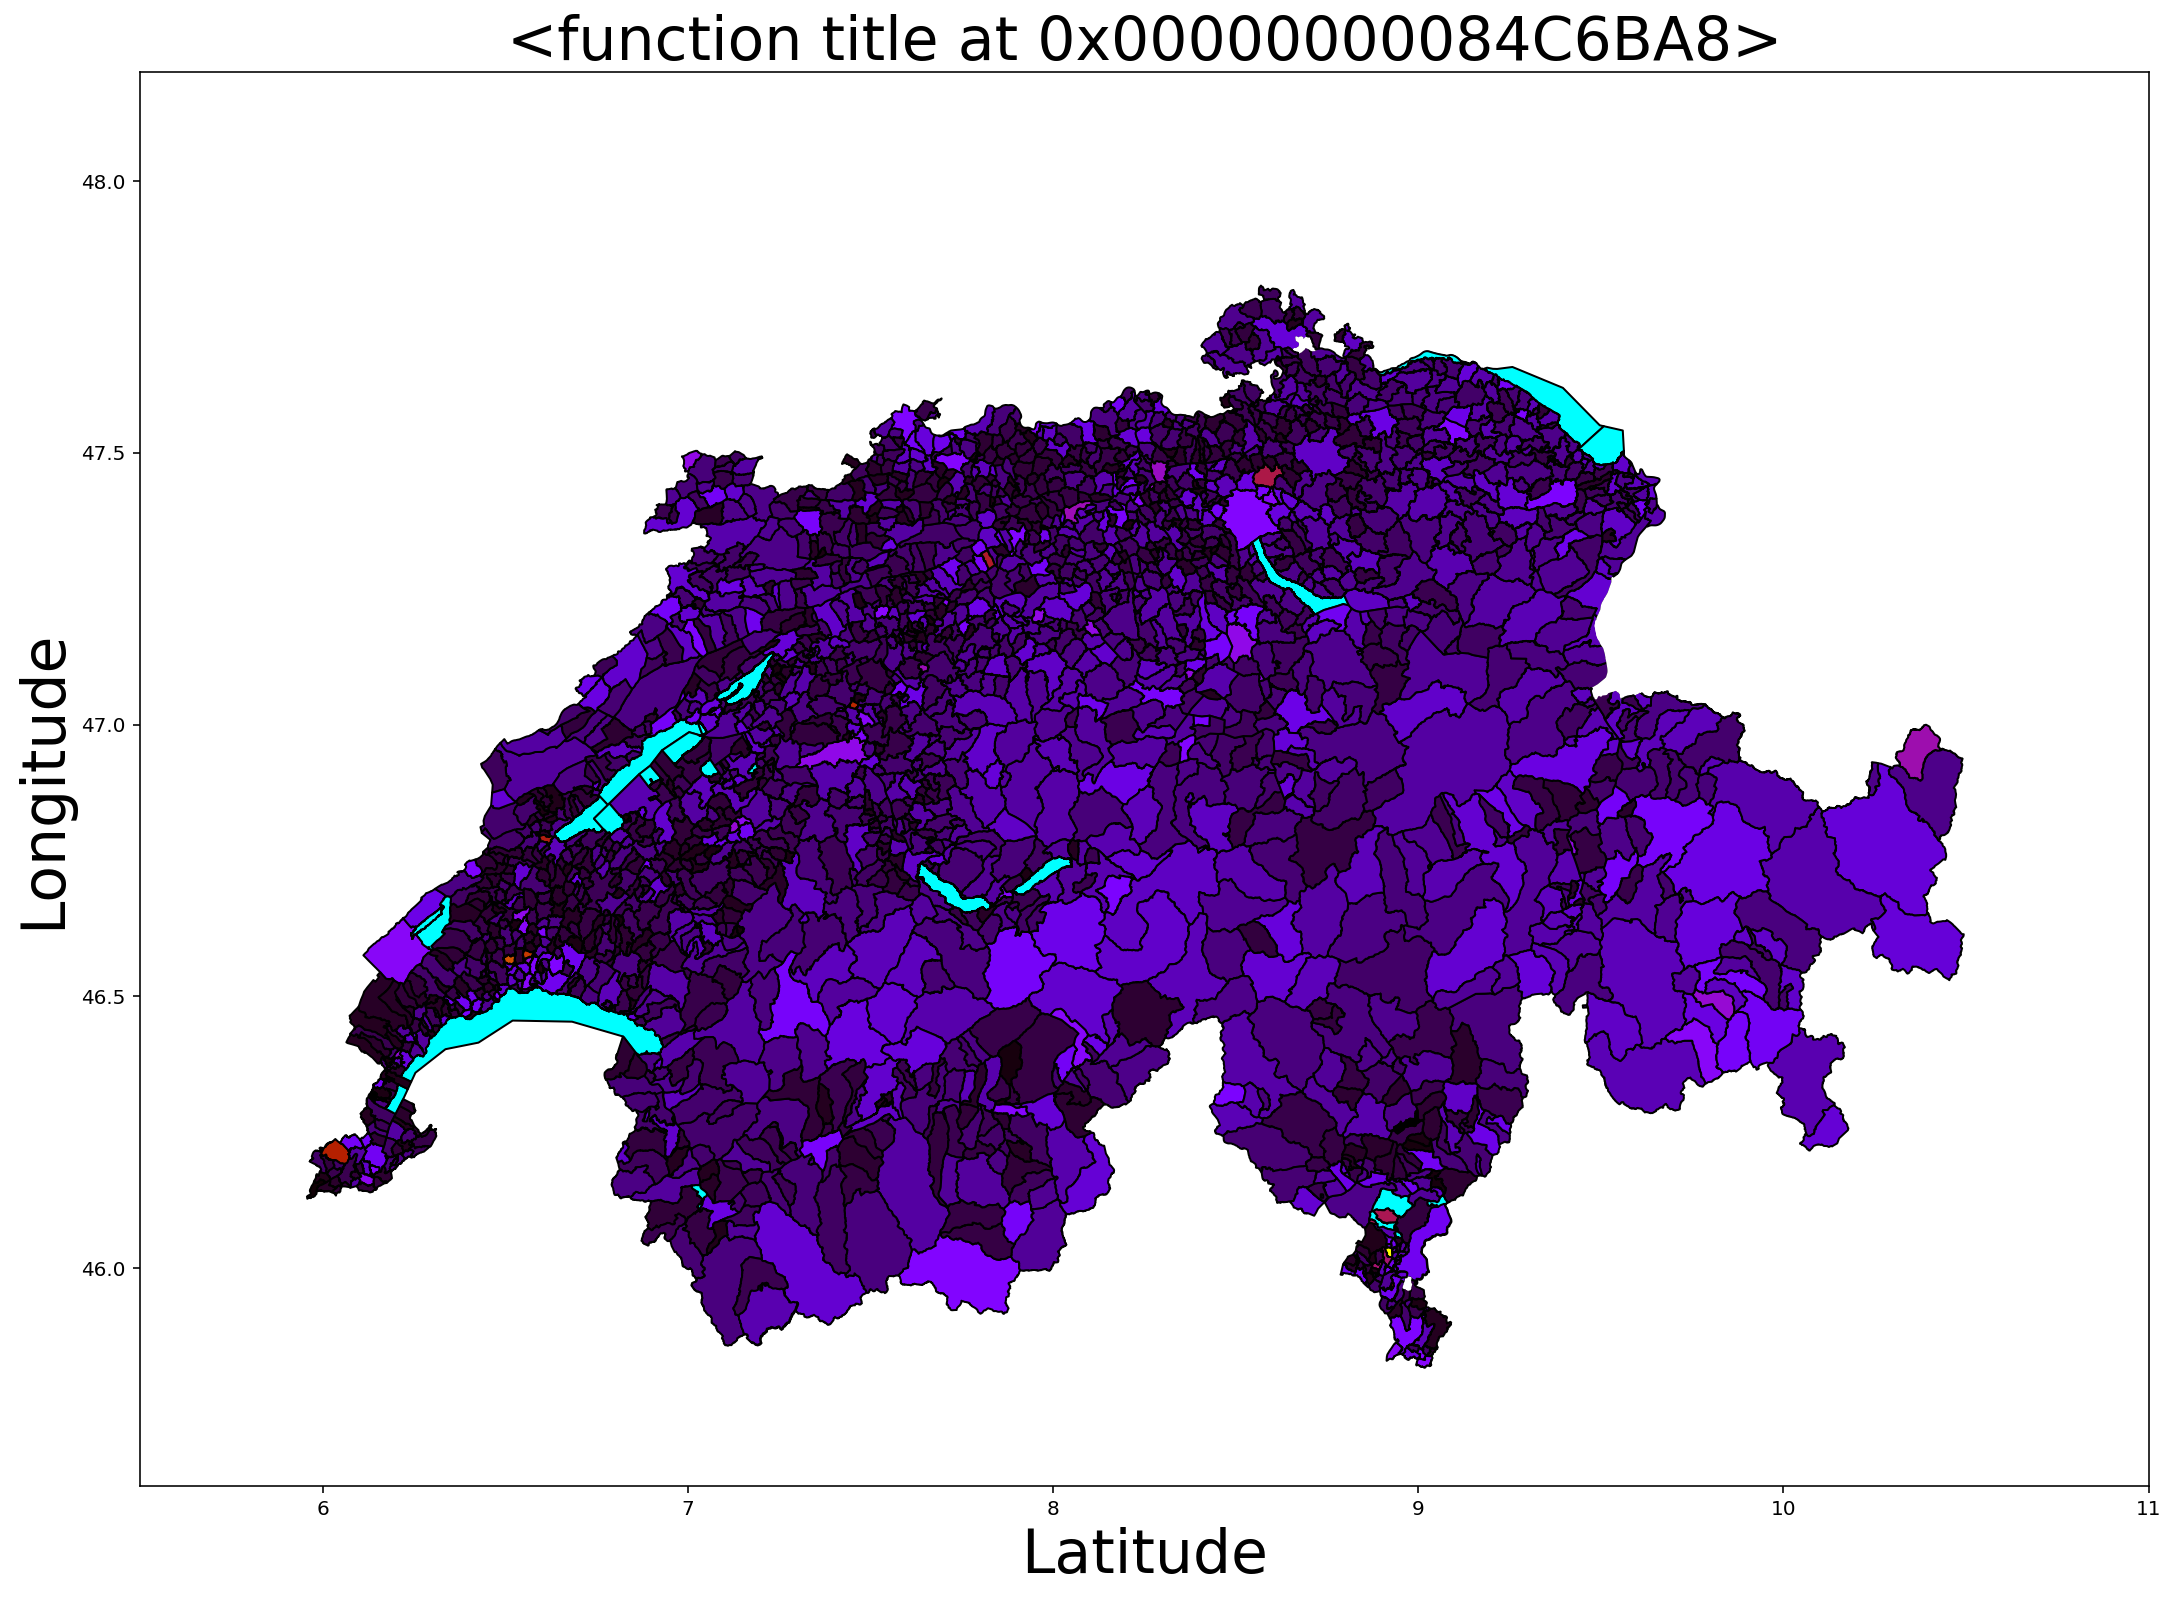

In [43]:
fig,ax = plt.subplots(figsize=(18,13))
cout = 0
tot = 0
l = []
for nshp in xrange(Nshp):
    if recs[cout][15] not in l:
        l.append(recs[cout][15])
        tot+=1
    cc = 'cyan'
    ec = 'black'
    nameCity = recs[cout][15]
    tmpCity = df[df[name] == nameCity]
    if len(tmpCity) > 0:
        cc = color_producer.to_rgba( tmpCity[string][tmpCity.index[0]]  )
    else:
        missingCities.append([nameCity, cout, recs[cout][17]])
        if recs[cout][17]=='LI':
            cc = 'white'
            ec = 'white'
        if recs[cout][17]=='DE':
            cc = 'white'
            ec = 'white'
        if recs[cout][17]=='IT':
            cc = 'white'
            ec = 'white'
    cout+=1
    pts     = array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    bbPath = mplPath.Path(pts)
    ptchs   = []
    for pij in xrange(len(prt)):
        ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
        p = PatchCollection(ptchs,facecolor=cc, edgecolor=ec, linewidths = 1)
        ax.add_collection(p)
ax.set_xlim(5.5, 11)
ax.set_ylim(45.6,48.2)
ax.set_xlabel('Latitude',size = 30)
ax.set_ylabel('Longitude',size= 30)
ax.set_title(title,size= 30)

In [42]:
cc

'dwhite'